## Forest Cover Type

This dataset looks at the ecological data on 4 areas from Roosevelt National Forest of northern Colorado. Sampling forest cover type for a 30x30 meter areas, determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. These areas have minimal human disturbance, in order to provide insight on ecological data over forest management.

This dataset is leveraged to predict categorical values of trees, eliminating confounding factors of human interference, in order to predict a tree species, based on elevation, slope, soil type, cover type, shadow coverage, and local topography.

The insights from this data are useful for understanding the ecology of tree species in the areas sampled were pulled from (Roosevelt National Forest of north Colorado). Trees are an important part of a healthy ecosystem in earth, as they store carbon dioxide, which helps to slow global warming.

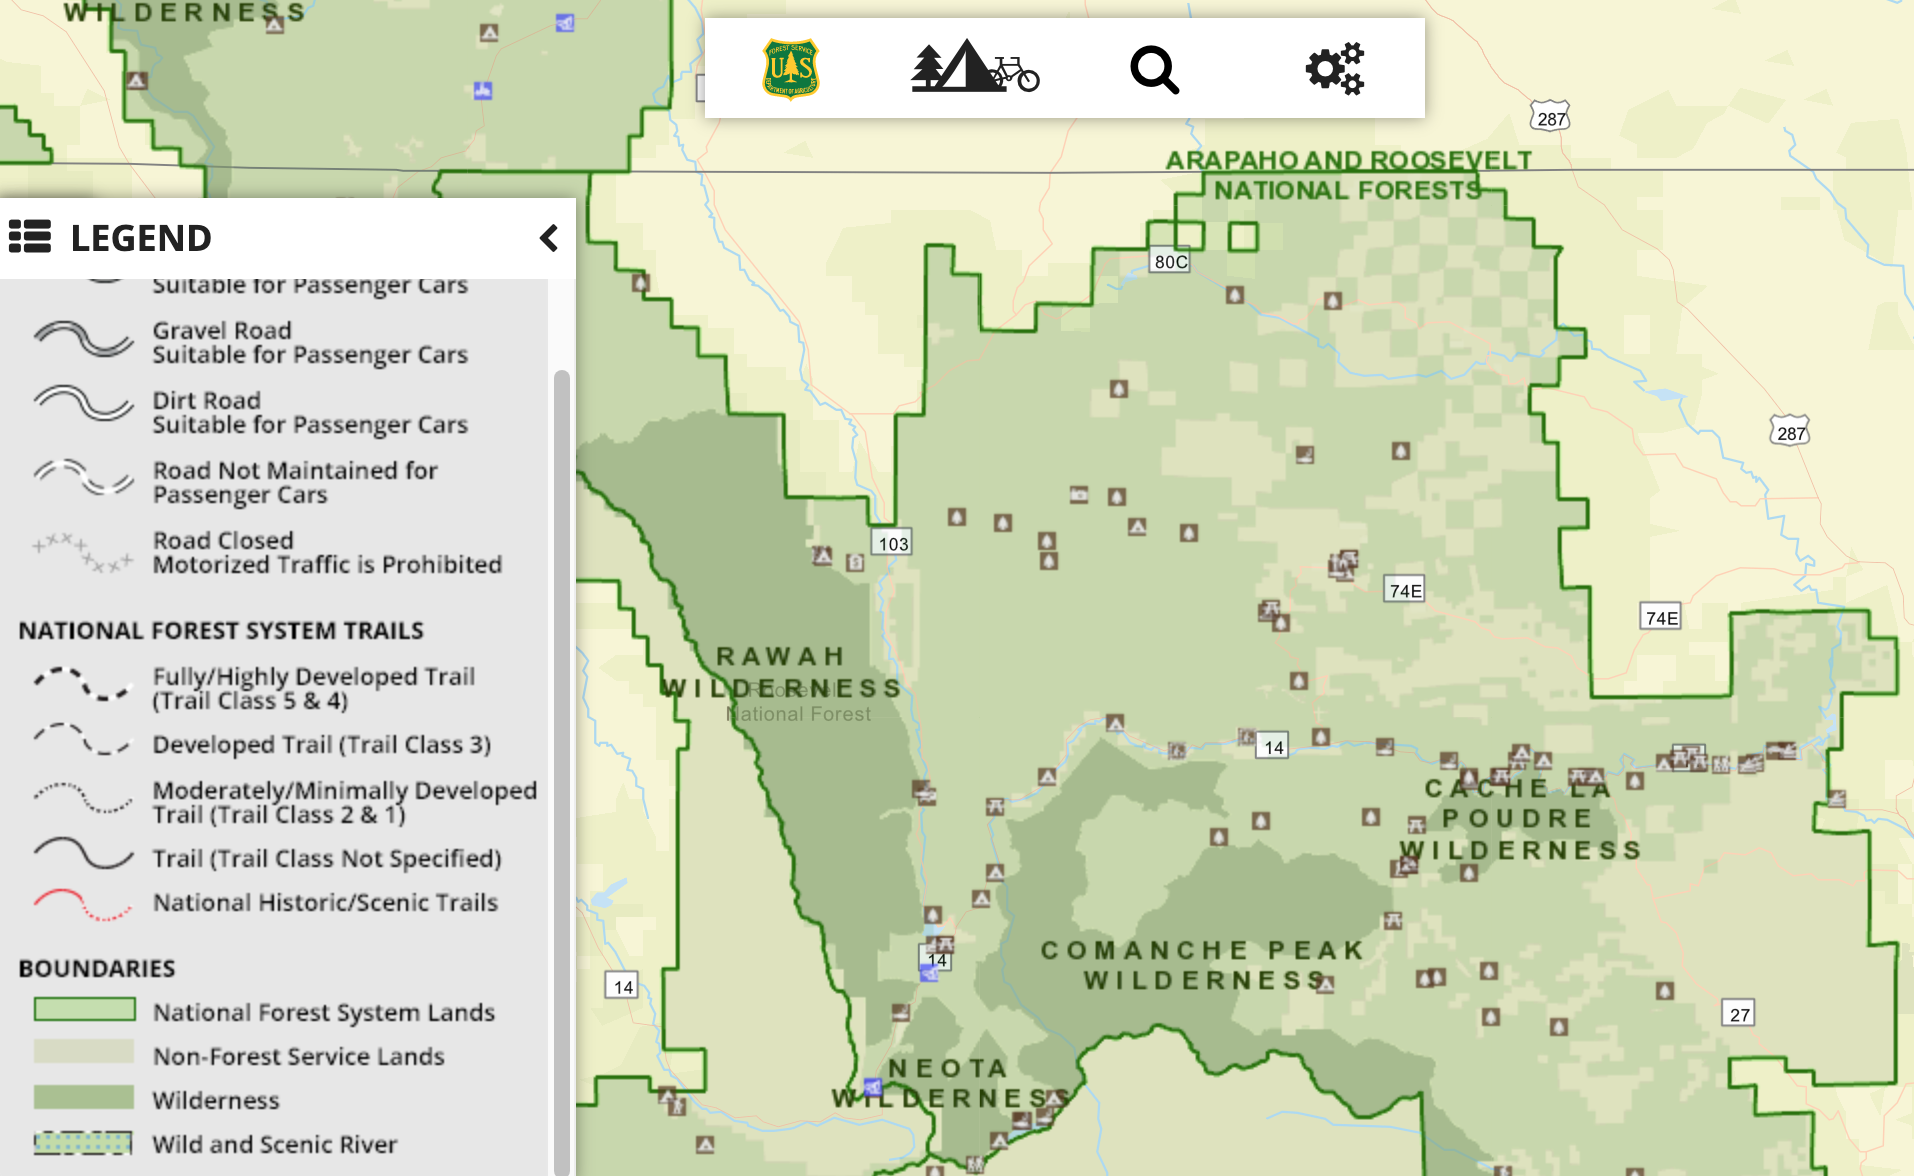

As for primary major tree species in these areas:
### Neota 
- spruce/fir (type 1)


### Rawah and Comanche Peak
- lodgepole pine (type 2)
- spruce/fir and aspen (type 5)

### Cache la Poudre 
- Ponderosa pine (type 3)
- Douglas-fir (type 6)
- Cottonwood/willow (type 4)

### Acknowledgement
This dataset is part of the UCI Machine Learning Repository, and the original source can be found here. The original database owners are Jock A. Blackard, Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and GIS Program at Colorado State University. (source: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset)


In [6]:
import pandas as pd

forest_cover_type = pd.read_csv('/Users/Apple/Desktop/covtype 3.csv')

In [7]:
forest_cover_type.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
